   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Learning rate: 0.001, R²: -6.3356
Learning rate: 0.005, R²: -2.3119
Learning rate: 0.01, R²: -0.2365
Learning rate: 0.02, R²: 0.8003
Learning rate: 0.05, R²: 0.9566
Best learning rate: 0.05
Best R²: 0.9566


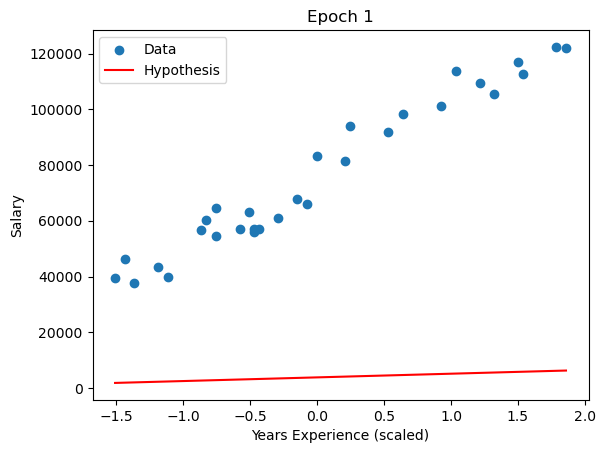

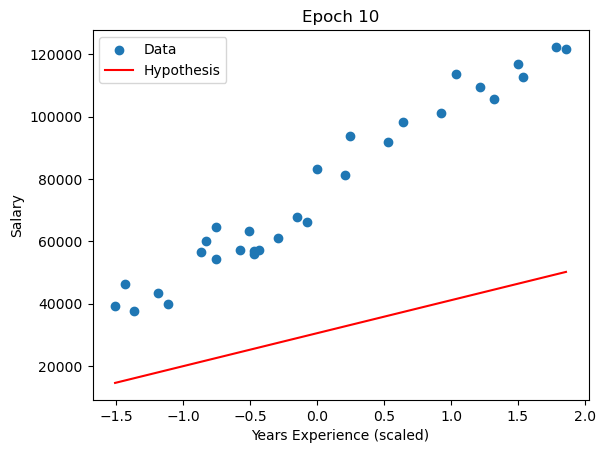

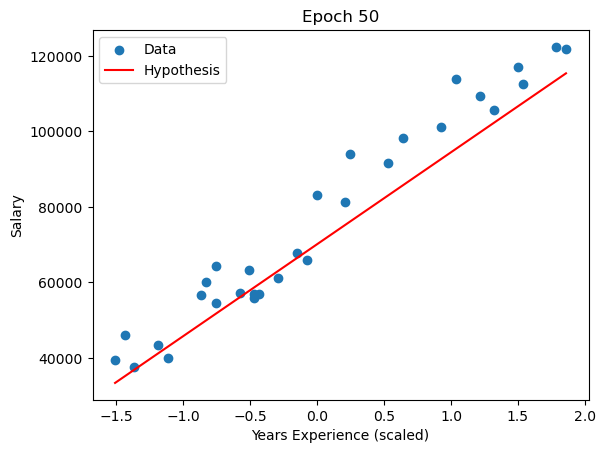

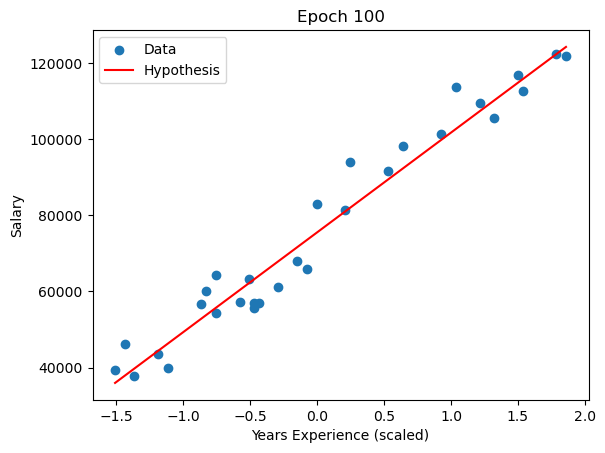

Final model parameters: [75553.02201767 26211.07476943]
Final model R²: 0.9566


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('china_gdp.csv')
X = df['Year'].values
y = df['Value'].values

# Define the logistic (sigmoid) function for non-linear regression
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guesses for curve_fit
p0 = [max(y), 0.03, 1990]  # L, k, x0

# Fit the sigmoid model to the data
popt, pcov = curve_fit(sigmoid, X, y, p0)
L, k, x0 = popt

# Predict
y_pred = sigmoid(X, L, k, x0)

# Calculate R²
r2 = r2_score(y, y_pred)
print(f"Fitted parameters: L={L:.2e}, k={k:.4f}, x0={x0:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot the Actual vs Predicted GDP
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual GDP')
plt.plot(X, y_pred, color='red', label='Predicted (Logistic Fit)')
plt.xlabel('Year')
plt.ylabel("China's GDP")
plt.title("China's GDP: Actual vs Predicted (Non-linear Regression)")
plt.legend()
plt.show()

# Plot Actual vs Predicted (scatter for diagonal comparison)
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title(f'Actual vs Predicted GDP (R² = {r2:.4f})')
plt.show()
